## Première extraction de texte

# TER - Extraction de texte et arXiv DOI pour générer un graphe de citation

## Objectifs de ce Notebook?

Objectifs:
- parser un article scientifique au format PDF en texte
- extraire de ce texte des informations utiles (articles cités, leur DOI arXiv, leurs auteurs)
- générer le graphe de citation depuis l'article source

## Données

Article source: /work/articletest.pdf


In [1]:
!pip install PyPDF2==3.0.1 

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


#### Parse l'article en PDF vers TEXTE : 

In [2]:
import PyPDF2

with open('articletest.pdf', 'rb') as file:
    # créer un objet pdf
    pdf = PyPDF2.PdfReader(file)
     #extraire le texte de chaque page
    t=''
    for page in range (len(pdf.pages)): 
        t+=pdf.pages[page].extract_text()
        #print(pdf.pages[page].extract_text())
    print(t)

consider ( salience ) is whether the linked document
can offer new, useful knowledge that may not be ob-
vious to the current LM. Hyperlinks are potentially
more advantageous than lexical similarity links in
this regard: LMs are shown to be good at recogniz-
ing lexical similarity (Zhang et al., 2020), and hyper-
links can bring in useful background knowledge thatmay not be obvious via lexical similarity alone (Asai
et al., 2020). Indeed, we empirically ﬁnd that using
hyperlinks yields a more performant LM (§5.5).
Diversity. In the document graph, some docu-
ments may have a very high in-degree (e.g., many
incoming hyperlinks, like the “United States” page
of Wikipedia), and others a low in-degree. If we uni-
formly sample from the linked documents for each
anchor segment, we may include documents of high
in-degree too often in the overall training data, los-
ing diversity. To adjust so that all documents appear
with a similar frequency in training, we sample a
linked document with pro

In [3]:
import re

regex = r"(?:ar[xX]iv:[0-9]*.*)"

test_str = t

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))
    
    for groupNum in range(0, len(match.groups())):
        groupNum = groupNum + 1
        
        print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))

у*0( )/- '/$*)+- $/$*)туƔcĹŚŌĒČȽƔèŚČţŘȽƔţŚƟĹĭƧţƧƓȽ
Match 2 was found at 52005-52023: arXiv:2107.06955 .
Match 3 was found at 54827-54845: arXiv:2108.07258 .
Match 4 was found at 55969-55987: arXiv:2101.00406 .
Match 5 was found at 58049-58067: arXiv:1704.05179 .
Match 6 was found at 58898-58916: arXiv:2007.15779 .
Match 7 was found at 63164-63182: arXiv:2110.04541 .
Match 8 was found at 64211-64229: arXiv:1907.11692 .
Match 9 was found at 65502-65520: arXiv:2012.14610 .
Match 10 was found at 68383-68401: arXiv:1908.08962 .
Match 11 was found at 69958-69976: arXiv:2201.05966 .
Match 12 was found at 71869-71887: arXiv:1905.07129 .


Trouve les citations dans un texte sous différents formats:

In [4]:
import re

regex = r"((?:[A-Z][A-Za-z'`-]+\s*et al.*\s*.\d{4}))|((?:[A-Z][a-z]*\s+)(?:[a-z]*\s*)(?:[A-Z][a-z]*)(?:,\s*)(?:\d{4}))|(?:[A-Z][a-z]*\s+)(?:et al.?)(?:,\s)(?:\d{4})|((?:[A-Z][a-z]*\s+)(?:al.?)(?:,\s*)(?:\d{4}))"

test_str = t

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))
    
    #for groupNum in range(0, len(match.groups())):
     #   groupNum = groupNum + 1
        
      #  print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))

Match 1 was found at 1408-1447: Devlin et al., 2019; Brown et al., 2020
Match 2 was found at 1631-1653: Bommasani
et al., 2021
Match 3 was found at 1732-1751: Devlin
et al., 2019
Match 4 was found at 1874-1894: Petroni et al.,
2019
Match 5 was found at 1896-1938: Bosselut et al., 2019; Raffel et al., 2020
Match 6 was found at 5097-5133: Liu et al., 2019; Joshi et al., 2020
Match 7 was found at 7240-7261: Margolis et al., 1999
Match 8 was found at 8731-8765: Yang
et al., 2015; Hu et al., 2020
Match 9 was found at 9431-9446: Gu et al., 2020
Match 10 was found at 9922-9965: Lewis et al., 2020b; Karpukhin et al., 2020
Match 11 was found at 9967-10002: Oguz
et al., 2020; Xie et al., 2022
Match 12 was found at 10349-10365: Guu et al. (2020
Match 13 was found at 10909-10926: Asai et al., 2020
Match 14 was found at 11038-11060: Caciularu et al. (2021
Match 15 was found at 11147-11166: Levine et al. (2021
Match 16 was found at 11828-11866: Chang et al. (2020); Asai et al. (2020
Match 17 was fou

#### En jouant avec les REGEX on cherche a match les auteur suivit d'un arXiv DOI: ne fonctionne pas bien

In [5]:
# coding=utf8
# the above tag defines encoding for this document and is for Python 2.x compatibility

import re

regex = r"(?:^[A-Z][a-z]*\s*[A-Z][a-z]*)(?![A-Z][a-z]*\s*[A-Z][a-z]*)|(?:ar[xX]iv:[0-9]*.*)"

test_str = t

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))

# Note: for Python 2.7 compatibility, use ur"" to prefix the regex and u"" to prefix the test string and substitution.


Match 1 was found at 58-76: Michihiro Yasunaga
Match 2 was found at 104-123: Stanford University
Match 3 was found at 160-177: Abstract
Language
Match 4 was found at 1122-1129: HotpotQ
Match 5 was found at 1402-1404: GP
Match 6 was found at 2026-2040: Language Model
Match 7 was found at 2312-2319: CreateL
Match 8 was found at 4517-4531: Cherry Blossom
Match 9 was found at 5388-5400: Washington D
у*0( )/- '/$*)+- $/$*)туƔcĹŚŌĒČȽƔèŚČţŘȽƔţŚƟĹĭƧţƧƓȽ
Match 11 was found at 9547-9551: MedQ
Match 12 was found at 10122-10124: LM
Match 13 was found at 10929-10939: Pretrain L
Match 14 was found at 12815-12817: KG
Match 15 was found at 12967-12970: KGs
Match 16 was found at 14070-14072: XA
Match 17 was found at 14167-14173: XBfrom
Match 18 was found at 15386-15403: Document Relation
Match 19 was found at 16728-16730: TF
Match 20 was found at 18044-18061: Document Relation
Match 21 was found at 18581-18583: XA
Match 22 was found at 20124-20126: LM
Match 23 was found at 24629-24636: Ho

#### En jouant avec les REGEX on cherche a match les auteur cités dans l'article :

In [6]:
# coding=utf8
# the above tag defines encoding for this document and is for Python 2.x compatibility

import re
import pandas as pd

new_df = pd.DataFrame(columns=['Author'])


regex = r"((?:[A-Z][A-Za-z'`-]+\s*et al.*\s*.\d{4}))|((?:[A-Z][a-z]*\s+)(?:[a-z]*\s*)(?:[A-Z][a-z]*)(?:,\s*)(?:\d{4}))|(?:[A-Z][a-z]*\s+)(?:et al.?)(?:,\s)(?:\d{4})|((?:[A-Z][a-z]*\s+)(?:al.?)(?:,\s*)(?:\d{4}))"

test_str = t

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    row = [match.group()]
    new_df.loc[len(new_df)] = row

new_df


,Author
0,"Devlin et al., 2019; Brown et al., 2020"
1,"Bommasani\net al., 2021"
2,"Devlin\net al., 2019"
3,"Petroni et al.,\n2019"
4,"Bosselut et al., 2019; Raffel et al., 2020"
...,...
86,Ansari et al. 2015)Doc B: ... Deep vein thromb...
87,Ansari et al. (2015
88,Piovella et al.\n(2002
89,"Sheng et al., 2020"


### modifie le df pr avoir le format auteur et al.,

In [7]:
new_df = new_df['Author'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
new_df = pd.DataFrame(new_df, columns=['Author'])
new_df['Author'] = new_df['Author'].str.replace(r'\(\d{4}.*\)', '')
new_df['Author'] = new_df['Author'].str.rstrip()



/tmp/ipykernel_1509/1604375964.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['Author'] = new_df['Author'].str.replace(r'\(\d{4}.*\)', '')


In [8]:
new_df

,Author
0,"Devlin et al., 2019"
0,"Brown et al., 2020"
1,"Bommasani\net al., 2021"
2,"Devlin\net al., 2019"
3,"Petroni et al.,\n2019"
...,...
86,Ansari et al. 2015)Doc B: ... Deep vein thromb...
87,Ansari et al. (2015
88,Piovella et al.\n(2002
89,"Sheng et al., 2020"


#### Extraction d'une des pages des 'REFERENCES' en texte :

In [9]:
from PyPDF2 import PdfReader

with open('articletest.pdf', 'rb') as file:
    # créer un objet pdf
    pdf = PyPDF2.PdfReader(file)
     #extraire le texte de chaque page
    references=''
    references=pdf.pages[9].extract_text()
    print(references)

feedback. We gratefully acknowledge the sup-
port of a PECASE Award; DARPA under Nos.
HR00112190039 (TAMI), N660011924033 (MCS);
Funai Foundation Fellowship; Microsoft Research
PhD Fellowship; ARO under Nos. W911NF-16-1-
0342 (MURI), W911NF-16-1-0171 (DURIP); NSF
under Nos. OAC-1835598 (CINES), OAC-1934578
(HDR), CCF-1918940 (Expeditions), IIS-2030477
(RAPID), NIH under No. R56LM013365; Stanford
Data Science Initiative, Wu Tsai Neurosciences
Institute, Chan Zuckerberg Biohub, Amazon,
JPMorgan Chase, Docomo, Hitachi, Intel, KDDI,
Toshiba, NEC, Juniper, and UnitedHealth Group.
References
Armen Aghajanyan, Dmytro Okhonko, Mike Lewis,
Mandar Joshi, Hu Xu, Gargi Ghosh, and Luke
Zettlemoyer. 2021. Htlm: Hyper-text pre-training
and prompting of language models. arXiv preprint
arXiv:2107.06955 .
David Ansari, Daniel Ansari, Roland Andersson, and
Åke Andrén-Sandberg. 2015. Pancreatic cancer and
thromboembolic disease, 150 years after trousseau.
Hepatobiliary surgery and nutrition , 4(5):325.
Ak

#### En jouant avec les REGEX on cherche a match les auteur suivit d'un arXiv DOI:

In [10]:
import re
import pandas as pd

some_author_doi = pd.DataFrame(columns=['Author','arXiv DOI'])


regex = r"(?s)^\s*([A-Z][a-z]*\s+[A-Z][a-z]+,).*?\.\s*\d{1,4}\s*\..*?\b(ar[xX]iv:\d+\.\d+)\.?"

test_str = references

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    row = [match.group(1),match.group(2)]
    some_author_doi.loc[len(some_author_doi)] = row

some_author_doi

,Author,arXiv DOI
0,"Armen Aghajanyan,",arXiv:2107.06955
1,"David Ansari,",arXiv:2108.07258
2,"Antoine Bordes,",arXiv:2101.00406


In [11]:
# coding=utf8
# the above tag defines encoding for this document and is for Python 2.x compatibility

import re

regex1 = r"^(?:[A-Z][A-Za-z'`-]+)"
regex2 = r"(?:ar[xX]iv:[0-9]*.*)"


test_str = t
matches = re.search(regex, test_str, re.MULTILINE)

matches = re.finditer(regex, test_str, re.MULTILINE)

matches2 = re.search(regex2, test_str, re.MULTILINE)

matches2 = re.finditer(regex2, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))

print("**************")
for matchNum, match in enumerate(matches2, start=1):
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))

Match 1 was found at 51818-52021: Armen Aghajanyan, Dmytro Okhonko, Mike Lewis,
Mandar Joshi, Hu Xu, Gargi Ghosh, and Luke
Zettlemoyer. 2021. Htlm: Hyper-text pre-training
and prompting of language models. arXiv preprint
arXiv:2107.06955
Match 2 was found at 52024-54843: David Ansari, Daniel Ansari, Roland Andersson, and
Åke Andrén-Sandberg. 2015. Pancreatic cancer and
thromboembolic disease, 150 years after trousseau.
Hepatobiliary surgery and nutrition , 4(5):325.
Akari Asai, Kazuma Hashimoto, Hannaneh Hajishirzi,
Richard Socher, and Caiming Xiong. 2020. Learning
to retrieve reasoning paths over wikipedia graph for
question answering. In International Conference on
Learning Representations (ICLR) .
Simon Baker, Ilona Silins, Yufan Guo, Imran Ali,
Johan Högberg, Ulla Stenius, and Anna Korhonen.
2016. Automatic semantic classiﬁcation of scientiﬁc
literature according to the hallmarks of cancer.
Bioinformatics .
Iz Beltagy, Kyle Lo, and Arman Cohan. 2019. Scibert:
Pretrained language mo

#### Match les arXiv DOI dans l'article :


In [12]:
# coding=utf8
# the above tag defines encoding for this document and is for Python 2.x compatibility

import re

regex = r"(arXiv:\d+\.\d+)"

arXiv_doi = pd.DataFrame(columns=['arXiv DOI'])

test_str = t

matches = re.finditer(regex, test_str)

for matchNum, match in enumerate(matches, start=1):
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))
    row = [match.group(1)]
    arXiv_doi.loc[len(arXiv_doi)] = row

arXiv_doi['arXiv DOI'] = arXiv_doi['arXiv DOI'].str.replace('arXiv:', '')
arXiv_doi
      
    


Match 1 was found at 6038-6054: arXiv:2203.15827
Match 2 was found at 52005-52021: arXiv:2107.06955
Match 3 was found at 54827-54843: arXiv:2108.07258
Match 4 was found at 55969-55985: arXiv:2101.00406
Match 5 was found at 58049-58065: arXiv:1704.05179
Match 6 was found at 58898-58914: arXiv:2007.15779
Match 7 was found at 63164-63180: arXiv:2110.04541
Match 8 was found at 64211-64227: arXiv:1907.11692
Match 9 was found at 65502-65518: arXiv:2012.14610
Match 10 was found at 68383-68399: arXiv:1908.08962
Match 11 was found at 69958-69974: arXiv:2201.05966
Match 12 was found at 71869-71885: arXiv:1905.07129


,arXiv DOI
0,2203.15827
1,2107.06955
2,2108.07258
3,2101.00406
4,1704.05179
5,2007.15779
6,2110.04541
7,1907.11692
8,2012.14610
9,1908.08962


In [13]:
!pip install arxiv==1.4.3

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


#### Retrouver le nom de l'article et le nom des auteurs avec les DOI :

In [47]:
import arxiv

# Initialiser une DataFrame pour stocker les informations sur les auteurs et les articles
arXiv_info = pd.DataFrame(columns=['DOI','Title', 'Author(s)','Abstract'])

# Boucle à travers les informations stockées dans la DataFrame "arXiv_doi"
for i, row in arXiv_doi.iterrows():
    arXiv_id = row['arXiv DOI']
    #print(arXiv_id)
    try:
        # Utiliser la bibliothèque "arxiv" pour obtenir les informations sur l'article
        query = arxiv.Search(arXiv_id)
        paper = next(query.results())

        title = paper.title
        
        authors = ', '.join([author.name for author in paper.authors])
        #authors = paper.authors[0]
        abstract = paper.summary
        
        #Ajouter les informations à la DataFrame "arXiv_info"
        arXiv_info.loc[i] = [arXiv_id, title, authors,abstract]
    except:
        print(f"Erreur pour retrouver les informations de {arXiv_id}")

arXiv_info

,DOI,Title,Author(s),Abstract
0,2203.15827,LinkBERT: Pretraining Language Models with Doc...,"Michihiro Yasunaga, Jure Leskovec, Percy Liang",Language model (LM) pretraining can learn vari...
1,2107.06955,HTLM: Hyper-Text Pre-Training and Prompting of...,"Armen Aghajanyan, Dmytro Okhonko, Mike Lewis, ...","We introduce HTLM, a hyper-text language model..."
2,2108.07258,On the Opportunities and Risks of Foundation M...,"Rishi Bommasani, Drew A. Hudson, Ehsan Adeli, ...",AI is undergoing a paradigm shift with the ris...
3,2101.00406,CDLM: Cross-Document Language Modeling,"Avi Caciularu, Arman Cohan, Iz Beltagy, Matthe...",We introduce a new pretraining approach geared...
4,1704.05179,SearchQA: A New Q&A Dataset Augmented with Con...,"Matthew Dunn, Levent Sagun, Mike Higgins, V. U...","We publicly release a new large-scale dataset,..."
5,2007.15779,Domain-Specific Language Model Pretraining for...,"Yu Gu, Robert Tinn, Hao Cheng, Michael Lucas, ...","Pretraining large neural language models, such..."
6,2110.04541,The Inductive Bias of In-Context Learning: Ret...,"Yoav Levine, Noam Wies, Daniel Jannai, Dan Nav...",Pretraining Neural Language Models (NLMs) over...
7,1907.11692,RoBERTa: A Robustly Optimized BERT Pretraining...,"Yinhan Liu, Myle Ott, Naman Goyal, Jingfei Du,...",Language model pretraining has led to signific...
8,2012.14610,UniK-QA: Unified Representations of Structured...,"Barlas Oguz, Xilun Chen, Vladimir Karpukhin, S...",We study open-domain question answering with s...
9,1908.08962,Well-Read Students Learn Better: On the Import...,"Iulia Turc, Ming-Wei Chang, Kenton Lee, Kristi...",Recent developments in natural language repres...


test qui montre qu' on ne peut pas obtenir de keyword avec la biblio arxiv

In [40]:
import arxiv

arXiv_id = "2107.06955"

# Utiliser la bibliothèque "arxiv" pour faire une requête à l'API arXiv
query = arxiv.Search(arXiv_id)
paper = next(query.results())

# Récupérer le résumé de l'article
summary = paper.summary

# Récupérer la catégorie de l'article
category = paper.category

print("Summary: ", summary)
print("Category: ", category)


AttributeError: 'Result' object has no attribute 'category'

test 

In [63]:
arXiv_info['First_Author_Last_Name'] = arXiv_info['Author(s)'].apply(lambda x: x.split(',')[0].strip().split(' ')[-1])

#merged_df = pd.merge(df_author_context, arXiv_info, left_on='Author', right_on='Author(s)')
#merged_df
arXiv_info['First_Author_Last_Name']

0       Yasunaga
1     Aghajanyan
2      Bommasani
3      Caciularu
4           Dunn
5             Gu
6         Levine
7            Liu
8           Oguz
9           Turc
10           Xie
11         Zhang
Name: First_Author_Last_Name, dtype: object

#### Extraction du contexte de citation avec le nom du premier auteur dans le texte:

In [18]:
for index, row in arXiv_info.iterrows():
    doi = row['DOI']
    title = row['Title']
    authors = row['Author(s)']
    first_author = authors.split(',')[0]
    if first_author in t:
        print("Le nom du premier auteur '{}' a été trouvé dans le texte pour l'article '{}' avec le DOI '{}'".format(first_author, title, doi))


## à faire ne garder les nom des auteur ss forme (xxx et al) pr matcher ci dessous

In [19]:
df_author_context = pd.DataFrame(columns=['Author','context_left','context_right'])

for index, row in new_df.iterrows():
    authors = row['Author']
    first_author = authors.split(',')[0]
    author_index = t.find(first_author)
    if author_index != -1:
        author_start = max(0, author_index - 30 * len(first_author))
        author_end = min(len(t), author_index + 30 * len(first_author))
        #context = t[author_start:author_end]
        #print("Le nom du premier auteur '{}' a été trouvé dans le texte pour l'article '{}' avec le DOI '{}' avec le contexte suivant :\n{}".format(first_author, title, doi, context))
        context_left = t[author_start:author_index]
        context_right = t[author_index:author_end]
        df_author_context = df_author_context.append({'Author': first_author, 'context_left': context_left, 'context_right': context_right}, ignore_index=True)

df_author_context


,Author,context_left,context_right
0,Devlin et al.,. LinkBERT is\nespecially effective for multi-...,"Devlin et al., 2019; Brown et al., 2020), have..."
1,Brown et al.,ally effective for multi-hop reasoning and\nfe...,"Brown et al., 2020), have\nshown remarkable p..."
2,Bommasani\net al.,ur biomedical\nLinkBERT sets new states of the...,"Bommasani\net al., 2021). By performing self-s..."
3,Devlin\net al.,"ntroduction\nPretrained language models (LMs),...","Devlin\net al., 2019), LMs learn to encode var..."
4,Petroni et al.,\nshown remarkable performance on many natural...,"Petroni et al.,\n2019; Bosselut et al., 2019; ..."
...,...,...,...
103,Ansari et al. 2015)Doc B: ... Deep vein thromb...,"(§4.2).\net al., 2007), and report the average...",Ansari et al. 2015)Doc B: ... Deep vein thromb...
104,Ansari et al. (2015,"“blood” for choice D), BioLinkBERT\ncorrectly ...",Ansari et al. (2015) in\nPubMed mention that p...
105,Piovella et al.\n(2002,ntuition is\nthat citation links bring relevan...,"Piovella et al.\n(2002), which mention that de..."
106,Sheng et al.,ions and risks\nWe outline potential ethical i...,"Sheng et al., 2020).\nAnother source of ethica..."


In [43]:
df_author_context['Author']=df_author_context['Author'].apply(lambda x: x.split()[0])

In [64]:
df_author_context_arXiv_only = df_author_context[df_author_context['Author'].isin(arXiv_info['First_Author_Last_Name'].values)]
df_author_context_arXiv_only = df_author_context_arXiv_only.merge(arXiv_info[['First_Author_Last_Name', 'DOI', 'Title','Abstract']],
                                                                  left_on='Author', right_on='First_Author_Last_Name',
                                                                  how='left')


In [72]:
df_author_context_arXiv_only

,context_left,context_right,DOI,Abstract
0,ur biomedical\nLinkBERT sets new states of the...,"Bommasani\net al., 2021). By performing self-s...",2108.07258,AI is undergoing a paradigm shift with the ris...
1,"us applications, including\nanswering a questi...","Liu et al., 2019; Joshi et al., 2020)\nand do ...",1907.11692,Language model pretraining has led to signific...
2,in both domains.LinkBERT consistently improve...,"Gu et al., 2020) and sets\nnew states of the a...",2007.15779,"Pretraining large neural language models, such..."
3,"arge\ngains for multi-hop reasoning, multi-doc...","Oguz\net al., 2020; Xie et al., 2022) introduc...",2012.14610,We study open-domain question answering with s...
4,"ti-hop reasoning, multi-document\nunderstandin...","Xie et al., 2022) introduce a retrieval\nmodu...",2201.05966,Structured knowledge grounding (SKG) leverages...
5,LM with a retriever that learns to retrieve t...,Caciularu et al. (2021) place doc-\numents (ne...,2101.00406,We introduce a new pretraining approach geared...
6,"es knowledge\nthat spans across documents, whi...",Levine et al. (2021) place sen-\ntences of hig...,2110.04541,Pretraining Neural Language Models (NLMs) over...
7,uestion answering.\nMa et al. (2021) study var...,"Yasunaga et al.,\n2019; Bhagavatula et al., 20...",2203.15827,Language model (LM) pretraining can learn vari...
8,"ers (Qazvinian and Radev, 2008; Yasunaga et al...",Zhang et al. (2019); He et al. (2020);\nWang e...,1905.07129,Neural language representation models such as ...
11,§6). Hy-\nperlinks have a number of advantages...,"Aghajanyan\net al., 2021). To construct the do...",2107.06955,"We introduce HTLM, a hyper-text language model..."


DF cleaned of author context arxiv only 

In [66]:
df_author_context_arXiv_only.drop(df_author_context_arXiv_only.columns[[0,3,5]], axis=1,inplace=True)


Supprimer les arXiv id en doubles 

In [69]:
df_author_context_arXiv_only= df_author_context_arXiv_only.drop_duplicates(subset='DOI', keep='first')

In [71]:
df_author_context_arXiv_only

,context_left,context_right,DOI,Abstract
0,ur biomedical\nLinkBERT sets new states of the...,"Bommasani\net al., 2021). By performing self-s...",2108.07258,AI is undergoing a paradigm shift with the ris...
1,"us applications, including\nanswering a questi...","Liu et al., 2019; Joshi et al., 2020)\nand do ...",1907.11692,Language model pretraining has led to signific...
2,in both domains.LinkBERT consistently improve...,"Gu et al., 2020) and sets\nnew states of the a...",2007.15779,"Pretraining large neural language models, such..."
3,"arge\ngains for multi-hop reasoning, multi-doc...","Oguz\net al., 2020; Xie et al., 2022) introduc...",2012.14610,We study open-domain question answering with s...
4,"ti-hop reasoning, multi-document\nunderstandin...","Xie et al., 2022) introduce a retrieval\nmodu...",2201.05966,Structured knowledge grounding (SKG) leverages...
5,LM with a retriever that learns to retrieve t...,Caciularu et al. (2021) place doc-\numents (ne...,2101.00406,We introduce a new pretraining approach geared...
6,"es knowledge\nthat spans across documents, whi...",Levine et al. (2021) place sen-\ntences of hig...,2110.04541,Pretraining Neural Language Models (NLMs) over...
7,uestion answering.\nMa et al. (2021) study var...,"Yasunaga et al.,\n2019; Bhagavatula et al., 20...",2203.15827,Language model (LM) pretraining can learn vari...
8,"ers (Qazvinian and Radev, 2008; Yasunaga et al...",Zhang et al. (2019); He et al. (2020);\nWang e...,1905.07129,Neural language representation models such as ...
11,§6). Hy-\nperlinks have a number of advantages...,"Aghajanyan\net al., 2021). To construct the do...",2107.06955,"We introduce HTLM, a hyper-text language model..."


In [73]:
df_author_context_arXiv_only.to_csv("df_author_context_arXiv_only.csv", index=False)


In [24]:
#print(df_author_context.iloc[69,2])

#### Tentative inverse retrouver le nom de l'article et leur DOI avec le nom des auteurs :

In [25]:
"""
import arxiv

# Initialiser une DataFrame pour stocker les informations sur les auteurs et les articles
arXiv_author_find_article = pd.DataFrame(columns=['Author(s)','DOI','Title', ])

# Boucle à travers les informations stockées dans la DataFrame "arXiv_doi"
for i, row in new_df.iterrows():
    arXiv_author = row['Author']
    #print(arXiv_id)
    try:
        # Utiliser la bibliothèque "arxiv.py" pour obtenir les informations sur l'article
        query = arxiv.Search(arXiv_author)
        paper = next(query.results())

        title = paper.title

        #authors = ', '.join([author.name for author in paper.authors])

        doi = paper.doi
        

        #Ajouter les informations à la DataFrame "aarXiv_author_find_article"
        arXiv_author_find_article.loc[i] = [arXiv_author, doi, title]
    except:
        print(f"Erreur pour retrouver les informations de {arXiv_author}")

arXiv_author_find_article
"""

'\nimport arxiv\n\n# Initialiser une DataFrame pour stocker les informations sur les auteurs et les articles\narXiv_author_find_article = pd.DataFrame(columns=[\'Author(s)\',\'DOI\',\'Title\', ])\n\n# Boucle à travers les informations stockées dans la DataFrame "arXiv_doi"\nfor i, row in new_df.iterrows():\n    arXiv_author = row[\'Author\']\n    #print(arXiv_id)\n    try:\n        # Utiliser la bibliothèque "arxiv.py" pour obtenir les informations sur l\'article\n        query = arxiv.Search(arXiv_author)\n        paper = next(query.results())\n\n        title = paper.title\n\n        #authors = \', \'.join([author.name for author in paper.authors])\n\n        doi = paper.doi\n        \n\n        #Ajouter les informations à la DataFrame "aarXiv_author_find_article"\n        arXiv_author_find_article.loc[i] = [arXiv_author, doi, title]\n    except:\n        print(f"Erreur pour retrouver les informations de {arXiv_author}")\n\narXiv_author_find_article\n'

In [26]:
!pip install networkx==3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


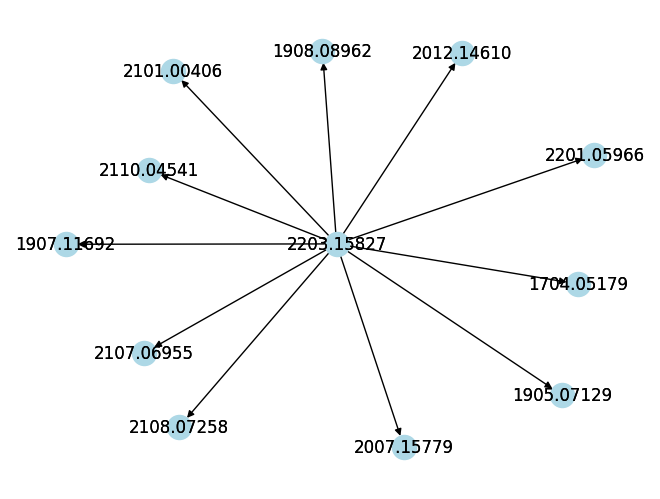

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe vide
G = nx.DiGraph()

# Ajouter le premier noeud central
central_node = arXiv_info.iloc[0]['DOI']
G.add_node(central_node)

# Boucle à travers les informations du reste du dataframe
for i, row in arXiv_info.iloc[1:].iterrows():
    doi = row['DOI']
    # Ajouter un noeud pour chaque entrée
    G.add_node(doi)
    # Ajouter un arc sortant du noeud central vers ce noeud
    G.add_edge(central_node, doi)

# Dessiner le graphe
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue')

# Afficher les informations sur les noeuds
labels = {node:node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels)

plt.show()

Pareil mais ajoute en plus le nom de l'article et ses auteurs mais rend le tout pas très lisible...

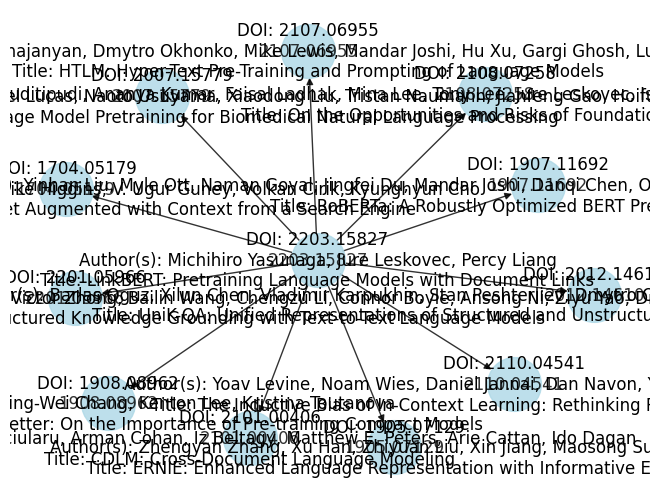

In [75]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialiser un graphe
G = nx.DiGraph()

# Ajouter le noeud central
G.add_node(arXiv_info.iloc[0]['DOI'], authors=arXiv_info.iloc[0]['Author(s)'], title=arXiv_info.iloc[0]['Title'])

# Boucle à travers les autres lignes du dataframe
for i in range(1, len(arXiv_info)):
    # Ajouter un noeud pour cette ligne
    G.add_node(arXiv_info.iloc[i]['DOI'], authors=arXiv_info.iloc[i]['Author(s)'], title=arXiv_info.iloc[i]['Title'])
    # Ajouter un arc entre ce noeud et le noeud central
    G.add_edge(arXiv_info.iloc[0]['DOI'], arXiv_info.iloc[i]['DOI'])

# Dessiner le graphe
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', alpha=0.8)
labels = {node: f"DOI: {node}\nAuthor(s): {G.nodes[node]['authors']}\nTitle: {G.nodes[node]['title']}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

plt.show()


Avec plotly tentative pour faire un graphe dynamique

In [ ]:
#https://plotly.com/python/network-graphs/
import plotly.graph_objects as go
nodes = []
edges = []

# Créez une liste de nœuds
for i, row in arXiv_info.iterrows():
    nodes.append({"id": i, "DOI": row['DOI'], "title": row['Title'], "authors": row['Author(s)']})

# Créez une liste d'arcs
for i, row in arXiv_info.iterrows():
    for j in range(i+1, len(arXiv_info)):
        edges.append({"source": i, "target": j})

# Créez un graphique de réseau à l'aide de Plotly
fig = go.Figure(
    go.Sankey(
        arrangement = 'snap',
        orientation = 'h',
        node=dict(
            label=nodes
        ),
        link=dict(
            source=[edge['source'] for edge in edges],
            target=[edge['target'] for edge in edges],
        ),
        #node_width=30
    )
)

# Ajoutez une interaction pour afficher les informations sur les nœuds lorsqu'ils sont sélectionnés
fig.update_layout(
    hovermode='closest',
    updatemenus=[
        dict(
            active=0,
            buttons=[
                dict(
                    label='DOI',
                    method='update',
                    args=[
                        {'visible': [False] * len(arXiv_info)},
                        {'title': 'DOI',
                         'annotations': [{
                             'text': node['DOI'],
                             'x': 0.5,
                             'y': 0.5} for i, node in enumerate(nodes)]}
                    ]
                ),
                dict(
                    label='Titre',
                    method='update',
                    args=[
                        {'visible': [False] * len(arXiv_info)},
                        {'title': 'Titre',
                         'annotations': [{
                             'text': node['title'],
                             'x': 0.5,
                             'y': 0.5} for i, node in enumerate(nodes)]}
                    ]
                ),
                 dict(
                    label='Auteur(s)',
                    method='update',
                    args=[
                        {'visible': [False] * len(arXiv_info)},
                        {'title': 'Auteur(s)',
                         'annotations': [{
                             'text': node['authors'],
                             'x': 0.5,
                             'y': 0.5} for i, node in enumerate(nodes)]}
                    ]
                ),
            ]
        )
    ]
)

# Afficher le graphique
fig.show()

Tout est trop écrasé il faudrait tenter de comprendre mieux la bibliotehque plotly

In [ ]:
import requests


arxiv_id = ids_list # mettre tout les ids arXiv dans une list à faire 

# Requête API arXiv pour obtenir les informations sur l'article
url = "http://export.arxiv.org/api/query?id_list=" + arxiv_id
response = requests.get(url)

# Transfo des informations sous forme de XML
data = response.text

# Extraction des auteurs de l'article
start = data.find("<author>")
end = data.find("</author>")
authors = data[start + 8:end].split(" and ")

# Affichage du premier auteur car que celui la qui nous intéresse 
print(authors[0])

NameError: name 'ids_list' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61df9ec0-4810-4690-90cf-bbe4fbfededd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>